In [3]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [4]:
def euler_method_system(equations, variables, initials, t0, t_end, h, params=None):
    """
    General Euler method solver for a system of first-order differential equations.

    Args:
    - equations (list of sympy expressions): List of symbolic expressions representing the system of ODEs.
    - variables (list of sympy symbols): List of dependent variables in the equations.
    - initials (list of floats): Initial values for the variables.
    - t0 (float): Start time.
    - t_end (float): End time.
    - h (float): Step size.
    - params (dict): Optional dictionary of parameters for the equations, with symbols as keys.

    Returns:
    - t_values (numpy array): Array of time points.
    - result (numpy array): Array of solution values, each row corresponds to a time point.
    """
    
    # Step 1: Create lambdified functions for each differential equation
    if params is None:
        params = {}  # Default to empty params if none are provided
    lambdified_eqns = [sp.lambdify(variables, eq.subs(params), 'numpy') for eq in equations]

    # Step 2: Prepare time array and initialize solution storage
    t_values = np.arange(t0, t_end, h)
    num_vars = len(variables)
    result = np.zeros((len(t_values), num_vars))  # Array to store the values of each variable at each time step
    result[0, :] = initials  # Set initial conditions
    
    # Step 3: Apply Euler's method iteratively
    current_values = np.array(initials, dtype=float)  # Current values of the variables
    
    for i, t in enumerate(t_values[:-1]):
        derivatives = np.array([f(*current_values) for f in lambdified_eqns])  # Compute derivatives for each variable
        current_values = current_values + h * derivatives  # Euler's update
        result[i + 1, :] = current_values  # Store updated values

    return t_values, result

In [5]:
def plot_results(t_values, result, labels):
    for i, label in enumerate(labels):
        plt.plot(t_values, result[:, i], label=label)
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.legend()
    plt.title("Euler's Method Solution")
    plt.grid(True)

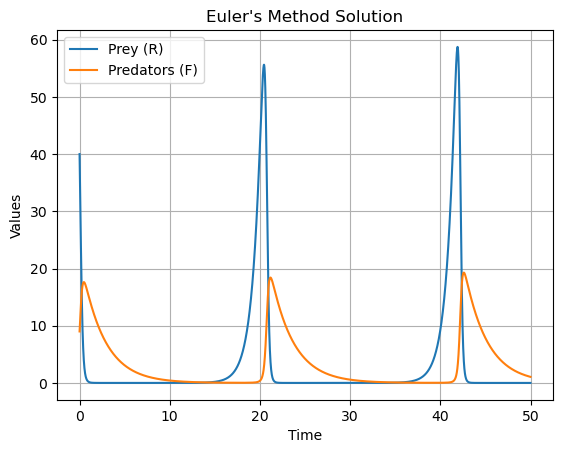

In [6]:
# Example: Predator-Prey Model (Lotka-Volterra Equations)

# Step 1: Define symbols
t = sp.symbols('t')
R, F = sp.symbols('R F')  # R for prey (rabbits), F for predator (foxes)

# Step 2: Define the system of equations
alpha, beta, gamma, delta = sp.symbols('alpha beta gamma delta')  # Parameters
dR_dt = alpha * R - beta * R * F  # Prey equation
dF_dt = delta * R * F - gamma * F  # Predator equation

# Step 3: Set up the system of equations
equations = [dR_dt, dF_dt]
variables = [R, F]  # The variables in the equations
initials = [40, 9]  # Initial prey and predator populations

# Parameters for the model
params = {alpha: 1.1, beta: 0.4, gamma: 0.4, delta: 0.1}

# Step 4: Time range and step size
t0, t_end, h = 0, 50, 0.01

# Step 5: Solve the system using Euler's method
t_values, result = euler_method_system(equations, variables, initials, t0, t_end, h, params=params)

# Step 6: Plot the results
plot_results(t_values, result, ['Prey (R)', 'Predators (F)'])




In [7]:
dR_dt

-F*R*beta + R*alpha